# Digital House - Data Science a Distancia

## Trabajo Final

### Autores: Daniel Borrino, Ivan Mongi, Jessica Polakoff, Julio Tentor
<p style="text-align:right;">Agosto 2022</p>

---
#### Aspectos técnicos

La notebook se ejecuta correctamente en una instalación estándar de Anaconda versión 4.12.0 build  3.21.6, Python 3.9.7


---
<h2>Índice</h2>

<div style="margin-left:20px;">
    

<a href="#">...</a>

<a href="#">...</a>

<a href="#">...</a>

</div>


---

#### Necessary libraries

In [1]:
import pandas as pd
import numpy as np


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#import warnings
#warnings.filterwarnings('ignore')


#### Style

In [4]:
sns.set()
plt.style.use('classic')
sns.mpl.rcParams['axes.titlesize'] = 20
sns.mpl.rcParams['axes.labelsize'] = 18


In [5]:
from IPython.display import HTML


---
#### EDA Functions for this notebook

---
<a name="Dataset"></a>

### Dataset


Autor: [Shivam Bansal](https://www.kaggle.com/shivamb) - [Elevator Predictive Maintenance Dataset](https://www.kaggle.com/datasets/shivamb/elevator-predictive-maintenance-dataset)

"*Datasets from a variety of IoT sensors for predictive maintenance in the elevator industry. The data is useful for predictive maintenance of elevators doors in order to reduce unplanned stops and maximize equipment life cycle.

The dataset contains operation data, in the form of time series sampled at 4Hz in high-peak and evening elevator usage in a building (between 16:30 and 23:30). For an elevator car door the system we consider: Electromechanical sensors (Door Ball Bearing Sensor), Ambiance (Humidity), and Physics (Vibration).

Target: Vibration (predict the absolute value of vibration)*"

In [6]:
# Train data
train_data = pd.read_csv('../Data/predictive-maintenance-dataset.csv')

In [11]:
data = train_data.copy()

In [19]:
columns = list(data.drop(['ID'], axis=1).columns)

In [21]:
columns

['revolutions', 'humidity', 'vibration', 'x1', 'x2', 'x3', 'x4', 'x5']

In [16]:
data.head(10)

,ID,revolutions,humidity,vibration,x1,x2,x3,x4,x5
0,1,93.744,73.999,18.00,167.743,19.745,1.266828,8787.937536,5475.852001
1,2,93.740,73.999,18.00,167.739,19.741,1.266774,8787.187600,5475.852001
2,3,93.736,73.998,18.00,167.734,19.738,1.266737,8786.437696,5475.704004
3,4,93.732,73.998,18.00,167.730,19.734,1.266683,8785.687824,5475.704004
4,5,93.729,73.998,18.00,167.727,19.731,1.266642,8785.125441,5475.704004
5,6,93.725,73.997,18.01,167.722,19.728,1.266605,8784.375625,5475.556009
6,7,93.721,73.997,18.01,167.718,19.724,1.266551,8783.625841,5475.556009
7,8,93.717,73.997,18.01,167.714,19.720,1.266497,8782.876089,5475.556009
8,9,93.713,73.996,18.01,167.709,19.717,1.266460,8782.126369,5475.408016
9,10,93.709,73.996,18.01,167.705,19.713,1.266406,8781.376681,5475.408016


In [17]:
data.describe()

,ID,revolutions,humidity,vibration,x1,x2,x3,x4,x5
count,112001.000000,112001.000000,112001.000000,109563.000000,112001.000000,112001.000000,112001.000000,112001.000000,112001.000000
mean,56001.000000,46.275195,74.224140,28.340276,120.499335,-27.948945,0.623759,2503.994994,5509.691804
std,32332.048087,19.042179,0.684711,24.292500,18.984921,19.123796,0.258677,1874.972912,101.395621
min,1.000000,16.933000,72.399000,2.000000,90.132000,-56.353000,0.231328,286.726489,5241.615201
25%,28001.000000,29.651000,73.914000,8.000000,103.850000,-44.548000,0.399615,879.181801,5463.279396
50%,56001.000000,43.348000,74.212000,21.280000,117.640000,-31.443000,0.580561,1879.049104,5507.420944
75%,84001.000000,63.997000,74.731000,39.210000,138.119000,-10.012000,0.865330,4095.616009,5584.722361
max,112001.000000,93.744000,75.400000,100.000000,167.743000,19.745000,1.266828,8787.937536,5685.160000


In [26]:
data.dtypes

ID               int64
revolutions    float64
humidity       float64
vibration      float64
x1             float64
x2             float64
x3             float64
x4             float64
x5             float64
dtype: object

In [18]:
def show_some_hists(data, columns, target=None, cols=4) :
    u'''
    Display some histograms graphs for specific columns in dataset

    args
        data : dataset
        columns : series to show 
        target : binary values to split the count; if None draw a simple histplot
        cols : number of columns for subplots
    
    Original from Flavio Cavalcante at https://www.kaggle.com/code/flaviocavalcante/simple-eda-to-start
    '''
    
    rows = (len(columns) // cols) + 1
    for i, column in enumerate(data[columns]) :
        try :
            plt.subplot(rows, cols, i+1)
            sns.histplot(data=data, x=column, kde=True, hue=target)
            plt.tight_layout();
            plt.xlabel(column);
            plt.ylabel(None);
        except :
            pass
    return

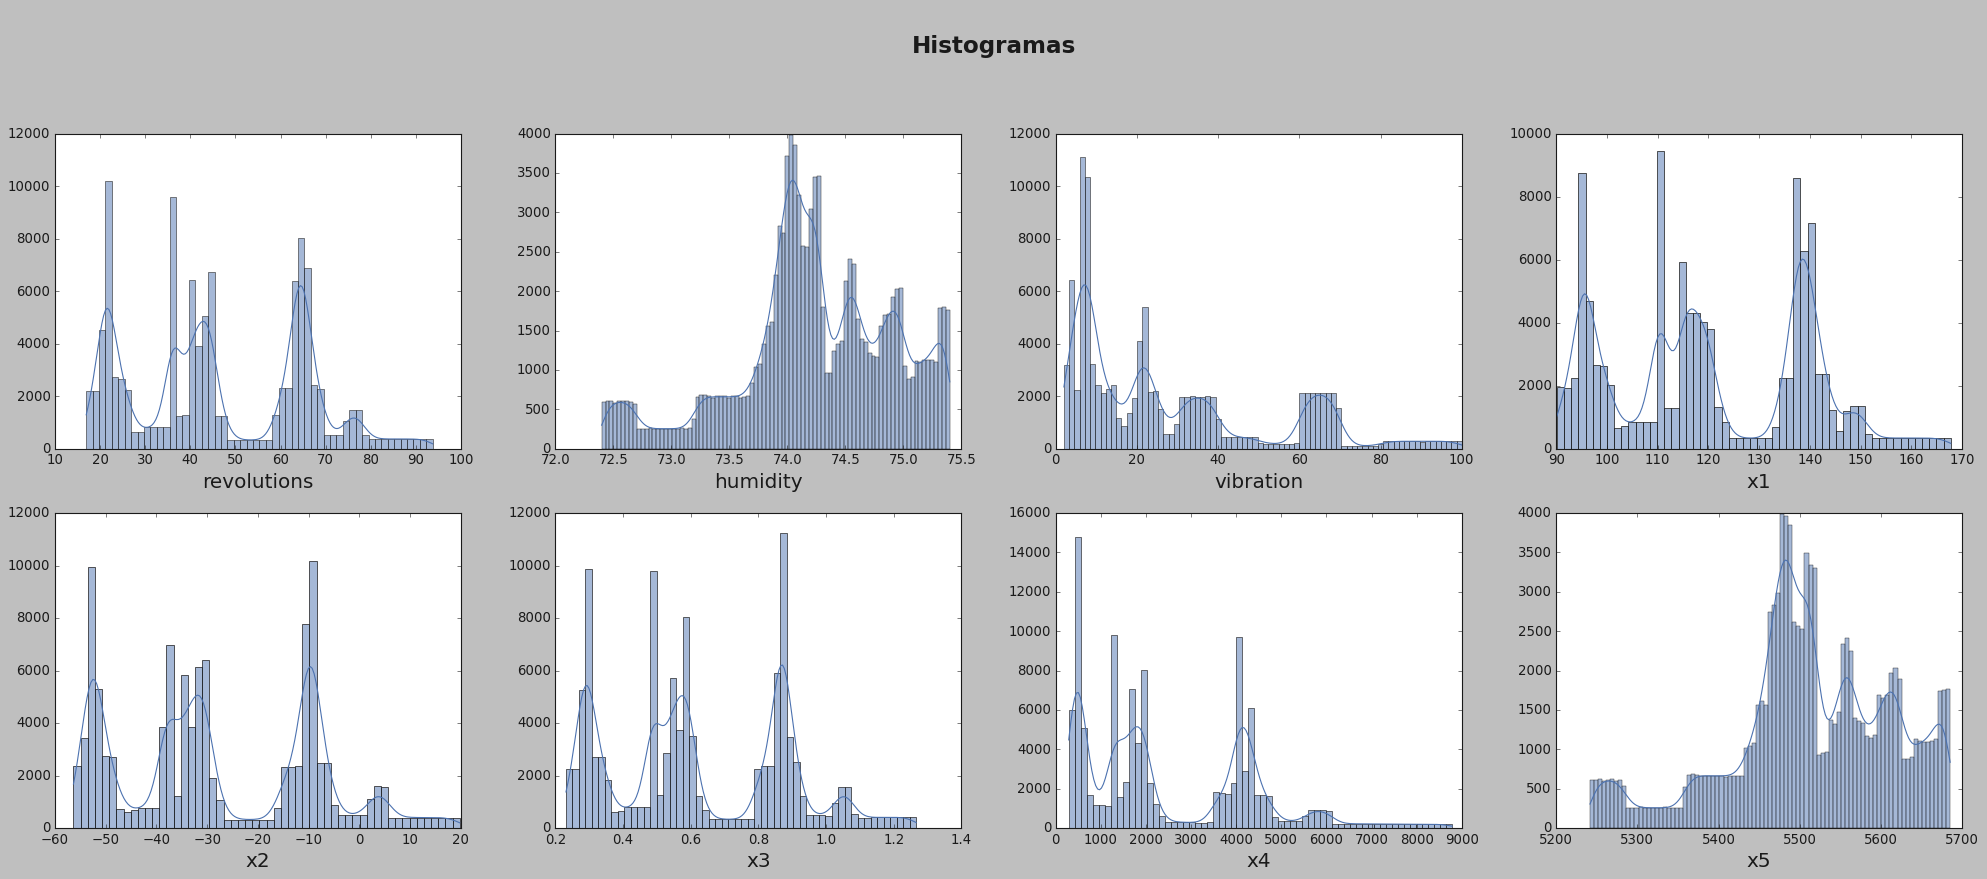

In [25]:
fig = plt.figure(figsize=(25,15));
fig.suptitle('\nHistogramas\n', verticalalignment='center', 
                 fontsize='xx-large', fontweight='extra bold')


show_some_hists(data=data, columns=columns, target=None)